<a href="https://colab.research.google.com/github/varshitmanepalli/Formula1-Data-Analysis/blob/my_branch_1/Notebooks/F1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("F1_DATA.csv",encoding='ISO-8859-1')

<ipython-input-3-5a074e5e3419>:1: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,40,44,45,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("F1_DATA.csv",encoding='ISO-8859-1')


In [ ]:
data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,...,PositionInLap,lap_times.time,pit_stops.stop,pit_stops.lap,pit_stops.duration,qualifying.position,qualifying.q1,qualifying.q2,qualifying.q3,status.status
0,20025,833,642,51,2.0,1,1.0,1,9,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
1,20026,833,786,51,3.0,2,2.0,2,6,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
2,20027,833,686,51,4.0,4,3.0,3,4,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
3,20028,833,704,154,14.0,6,4.0,4,3,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+2 Laps
4,20029,833,627,154,15.0,9,5.0,5,2,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+2 Laps


In [ ]:
data.describe()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,...,constructor_standings.wins,driver_standings.points,driver_standings.position,driver_standings.wins,LapNumber,PositionInLap,pit_stops.stop,pit_stops.lap,pit_stops.duration,qualifying.position
count,868872.000000,868872.000000,868872.000000,868872.000000,868866.000000,868872.000000,781938.000000,868872.000000,868872.000000,868872.000000,...,864951.000000,862628.000000,862628.000000,862628.000000,853176.000000,853176.000000,582092.000000,582092.000000,560630.000000,767597.000000
mean,17192.052969,700.124179,369.603343,51.368062,18.884897,10.805718,9.152091,10.000137,4.220416,59.085160,...,1.001239,39.803149,11.026126,0.501987,30.211193,9.988553,1.775082,26.201030,24.232680,10.898358
std,9414.030241,391.339097,394.005497,75.590370,19.215500,6.291987,5.234387,5.685889,6.470995,12.343054,...,2.462403,63.798470,6.612418,1.499062,18.339621,5.653001,0.925409,14.954314,4.444462,6.210494
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12.897000,1.000000
25%,4430.000000,209.000000,17.000000,5.000000,7.000000,5.000000,5.000000,5.000000,0.000000,53.000000,...,0.000000,1.000000,5.000000,0.000000,15.000000,5.000000,1.000000,14.000000,21.796000,5.000000
50%,21919.000000,890.000000,64.000000,9.000000,14.000000,11.000000,9.000000,10.000000,0.000000,58.000000,...,0.000000,13.000000,11.000000,0.000000,29.000000,10.000000,2.000000,26.000000,23.316000,11.000000
75%,23898.000000,994.000000,822.000000,51.000000,22.000000,16.000000,13.000000,15.000000,6.000000,69.000000,...,1.000000,47.000000,16.000000,0.000000,45.000000,15.000000,2.000000,37.000000,25.395000,16.000000
max,26085.000000,1110.000000,858.000000,214.000000,208.000000,34.000000,33.000000,39.000000,50.000000,200.000000,...,19.000000,454.000000,105.000000,15.000000,87.000000,24.000000,6.000000,78.000000,59.555000,28.000000


In [ ]:
threshold = 0.35  # 35%
missing_percentage = data.isna().mean()

# Filter out columns where the percentage of missing values is greater than the threshold
data = data.loc[:, missing_percentage <= threshold]
data.isna().sum()

resultId                               0
raceId                                 0
driverId                               0
constructorId                          0
number                                 6
grid                                   0
position                           86934
positionOrder                          0
points                                 0
laps                                   0
fastestLap                        148538
rank                              147962
fastestLapTime                    220621
fastestLapSpeed                   148538
races.date                             0
races.month                            0
races.year                             0
races.round                            0
races.name                             0
circuits.name                          0
circuits.location                      0
circuits.country                       0
drivers.code                       82877
drivers.FirstName                      0
drivers.SurName 

In [ ]:
data.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionOrder', 'points', 'laps', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'races.date', 'races.month',
       'races.year', 'races.round', 'races.name', 'circuits.name',
       'circuits.location', 'circuits.country', 'drivers.code',
       'drivers.FirstName', 'drivers.SurName', 'drivers.dob',
       'drivers.nationality', 'constructors.name', 'constructors.nationality',
       'constructor_standings.points', 'constructor_standings.position',
       'constructor_standings.wins', 'driver_standings.points',
       'driver_standings.position', 'driver_standings.wins', 'LapNumber',
       'PositionInLap', 'lap_times.time', 'pit_stops.stop', 'pit_stops.lap',
       'qualifying.position', 'qualifying.q1', 'status.status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868872 entries, 0 to 868871
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   resultId                        868872 non-null  int64  
 1   raceId                          868872 non-null  int64  
 2   driverId                        868872 non-null  int64  
 3   constructorId                   868872 non-null  int64  
 4   number                          868866 non-null  float64
 5   grid                            868872 non-null  int64  
 6   position                        781938 non-null  float64
 7   positionOrder                   868872 non-null  int64  
 8   points                          868872 non-null  int64  
 9   laps                            868872 non-null  int64  
 10  fastestLap                      720334 non-null  float64
 11  rank                            720910 non-null  float64
 12  fastestLapTime  

In [ ]:
data['races.name'].unique()

array(['British Grand Prix', 'Monaco Grand Prix', 'Indianapolis 500',
       'Swiss Grand Prix', 'Belgian Grand Prix', 'French Grand Prix',
       'Italian Grand Prix', 'German Grand Prix', 'Spanish Grand Prix',
       'Dutch Grand Prix', 'Argentine Grand Prix', 'Pescara Grand Prix',
       'Portuguese Grand Prix', 'Moroccan Grand Prix',
       'United States Grand Prix', 'South African Grand Prix',
       'Mexican Grand Prix', 'Austrian Grand Prix', 'Canadian Grand Prix',
       'Brazilian Grand Prix', 'Swedish Grand Prix',
       'United States Grand Prix West', 'Japanese Grand Prix',
       'San Marino Grand Prix', 'Caesars Palace Grand Prix',
       'Detroit Grand Prix', 'European Grand Prix', 'Dallas Grand Prix',
       'Australian Grand Prix', 'Hungarian Grand Prix',
       'Pacific Grand Prix', 'Luxembourg Grand Prix',
       'Malaysian Grand Prix', 'Bahrain Grand Prix',
       'Saudi Arabian Grand Prix', 'Chinese Grand Prix',
       '70th Anniversary Grand Prix', 'Tuscan Grand 

In [ ]:
data['circuits.name'].unique()

array(['Silverstone Circuit', 'Circuit de Monaco',
       'Indianapolis Motor Speedway', 'Circuit Bremgarten',
       'Circuit de Spa-Francorchamps', 'Reims-Gueux',
       'Autodromo Nazionale di Monza', 'Nürburgring',
       'Circuit de Pedralbes', 'Rouen-Les-Essarts',
       'Circuit Park Zandvoort', 'Autódromo Juan y Oscar Gálvez',
       'Aintree', 'Pescara Circuit', 'Circuito da Boavista', 'Ain Diab',
       'AVUS', 'Monsanto Park Circuit', 'Sebring International Raceway',
       'Riverside International Raceway', 'Watkins Glen',
       'Prince George Circuit', 'Autódromo Hermanos Rodríguez',
       'Brands Hatch', 'Zeltweg', 'Charade Circuit', 'Kyalami', 'Le Mans',
       'Mosport International Raceway', 'Jarama',
       'Circuit Mont-Tremblant', 'Montjuïc', 'Hockenheimring',
       'Red Bull Ring', 'Circuit Paul Ricard', 'Nivelles-Baulers',
       'Autódromo José Carlos Pace', 'Zolder', 'Scandinavian Raceway',
       'Dijon-Prenois', 'Long Beach', 'Fuji Speedway',
       'Autódr

<Axes: title={'center': 'Race Count by Country Throughout the History of F1'}, xlabel='Country', ylabel='Year'>

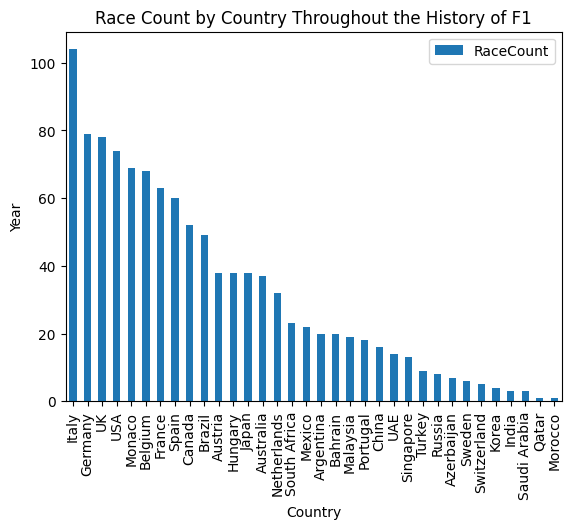

In [ ]:
countries_race_count = data.groupby('circuits.country')['raceId'].nunique().reset_index(name='RaceCount').sort_values(by='RaceCount',ascending=False)
countries_race_count.plot(kind='bar' , x='circuits.country',y='RaceCount',title='Race Count by Country Throughout the History of F1', xlabel = 'Country', ylabel = 'Year')

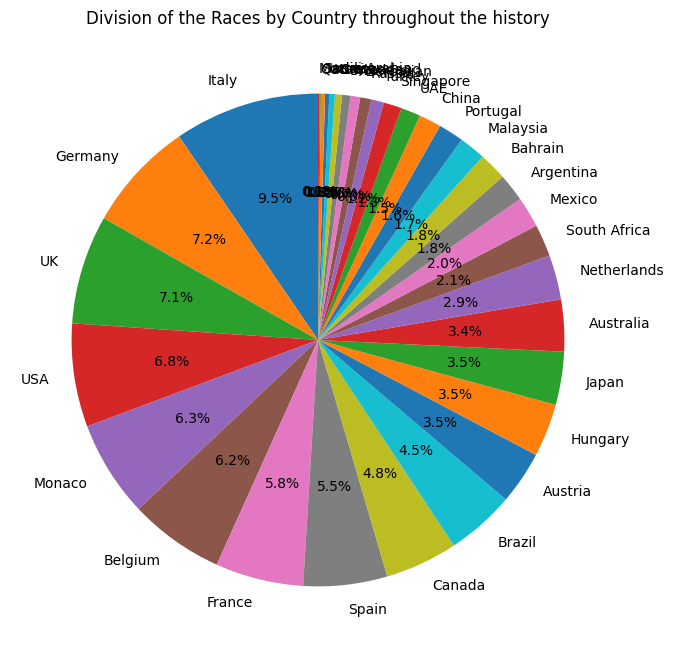

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(countries_race_count['RaceCount'], labels=countries_race_count['circuits.country'], autopct='%1.1f%%', startangle=90)
plt.title('Division of the Races by Country throughout the history')
plt.show()

<Axes: title={'center': 'Race Count By year'}, xlabel='Year', ylabel='Race Count'>

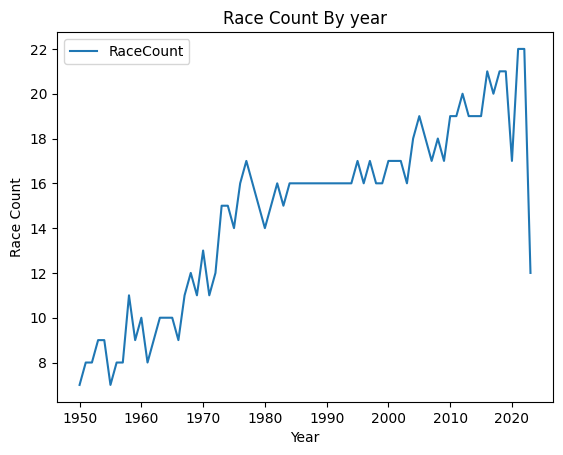

In [ ]:
race_count_by_year = data.groupby('races.year')['raceId'].nunique().reset_index(name='RaceCount')
race_count_by_year.plot(x='races.year',y='RaceCount',title='Race Count By year',xlabel='Year',ylabel='Race Count')

In [ ]:
data.groupby('circuits.country')['races.year'].unique()

circuits.country
Argentina       [1953, 1954, 1955, 1956, 1957, 1958, 1960, 197...
Australia       [1985, 1986, 1987, 1988, 1989, 1990, 1991, 199...
Austria         [1964, 1970, 1971, 1972, 1973, 1974, 1975, 197...
Azerbaijan             [2019, 2023, 2017, 2021, 2016, 2018, 2022]
Bahrain         [2004, 2005, 2006, 2007, 2008, 2009, 2020, 201...
Belgium         [1950, 1951, 1952, 1953, 1954, 1955, 1956, 195...
Brazil          [1973, 1974, 1975, 1976, 1977, 1978, 1979, 198...
Canada          [1967, 1968, 1969, 1970, 1971, 1972, 1973, 197...
China           [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
France          [1950, 1951, 1952, 1953, 1954, 1956, 1957, 195...
Germany         [1951, 1952, 1953, 1954, 1956, 1957, 1958, 195...
Hungary         [1986, 1987, 1988, 1989, 1990, 1991, 1992, 199...
India                                          [2011, 2012, 2013]
Italy           [1950, 1951, 1952, 1953, 1954, 1955, 1956, 195...
Japan           [1976, 1977, 1987, 1988, 1989, 1990, 1991, 

In [ ]:
data['Driver Full Name'] = data['drivers.FirstName'] + ' ' + data['drivers.SurName']

<Axes: title={'center': 'Top 10 Drives with Most Grand prix wins'}, xlabel='Driver Name', ylabel='No. of Grand Prix Wins'>

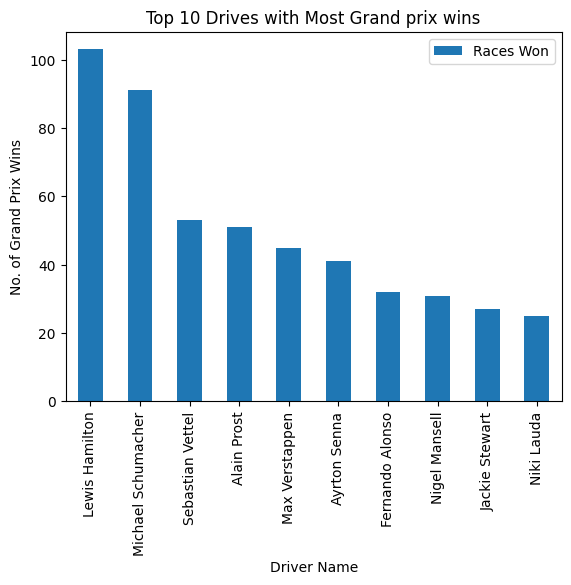

In [ ]:
races_won_by_driver = data[data['position']==1].drop_duplicates(['raceId','drivers.code']).groupby('Driver Full Name')['position'].count().reset_index(name='Races Won').sort_values(by='Races Won', ascending=False)
races_won_by_driver[:10].plot(kind='bar',x='Driver Full Name',y='Races Won',title = 'Top 10 Drives with Most Grand prix wins', xlabel = 'Driver Name', ylabel='No. of Grand Prix Wins')

In [ ]:
most_fastest_laps = data[data['rank']<=1].drop_duplicates(['raceId']).groupby('Driver Full Name')['rank'].count().reset_index(name='No. of Fastest Laps').sort_values(by='No. of Fastest Laps', ascending=False)
most_fastest_laps[:10]

,Driver Full Name,No. of Fastest Laps
21,Lewis Hamilton,55
19,Kimi Räikkönen,39
37,Sebastian Vettel,35
24,Max Verstappen,28
8,Fernando Alonso,23
25,Michael Schumacher,21
40,Valtteri Bottas,19
28,Nico Rosberg,15
22,Mark Webber,15
7,Felipe Massa,14


In [ ]:
data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,...,driver_standings.wins,LapNumber,PositionInLap,lap_times.time,pit_stops.stop,pit_stops.lap,qualifying.position,qualifying.q1,status.status,Driver Full Name
0,20025,833,642,51,2.0,1,1.0,1,9,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished,Nino Farina
1,20026,833,786,51,3.0,2,2.0,2,6,70,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished,Luigi Fagioli
2,20027,833,686,51,4.0,4,3.0,3,4,70,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished,Reg Parnell
3,20028,833,704,154,14.0,6,4.0,4,3,68,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+2 Laps,Yves Cabantous
4,20029,833,627,154,15.0,9,5.0,5,2,68,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+2 Laps,Louis Rosier


In [ ]:
import numpy as np
numeric_df = data.select_dtypes(include=[np.number])
# Setting the plot size
plt.figure(figsize=(10, 8))

# Creating the heatmap
sns.heatmap(numeric_df, annot=True, cmap='viridis', linewidths=.5)

# Adding titles and labels
plt.title('Detailed and Colorful Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Display the heatmap
plt.show()